<a href="https://colab.research.google.com/github/hasan-alj88/Group/blob/master/Obesity_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Obesity Classifer

Database source 
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#

The BMI calssifer model will classify the Obesity level in accoding to weight, Height, age and gender as it has been provided in the dataset upbove.


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Datasets/ObesityDataSet_raw_and_data_sinthetic.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


As per the provided Dataset the Obesity levels are catagorized in 7 levels  

In [ ]:
len(np.unique(data['NObeyesdad'].values))

7

##Data pre-processing
before feeding the Data in the classifer model we normailze the Data and numerate text data

In [ ]:
@np.vectorize
def gender_norm(g):
  return 0 if g=='Female' else 1
Obesity_levels = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II']
@np.vectorize
def Obesity_levels_norm(obs):
  return Obesity_levels.index(obs)
data['Gender'] = gender_norm(data['Gender'])
data['NObeyesdad'] = Obesity_levels_norm(data['NO'])
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,1
1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,1
2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,1
3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,5
4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,4
2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,4
2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,4
2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,4


Here the Data are shuffled and split into Training data and test data  

In [ ]:
from random import shuffle, seed
L = len(data)
n = int(0.75 * L)
shuffled_index = data.index.to_list()
seed(1322) # to reproduce
shuffle(shuffled_index)
data_train = data.iloc[shuffled_index[:n],:]
data_test  = data.iloc[shuffled_index[n+1:L],:]

data_train.loc[:,'Age']=data_train.loc[:,'Age']/200
data_train.loc[:,'Height']=data_train.loc[:,'Height']/2
data_train.loc[:,'Weight']=data_train.loc[:,'Weight']/200
data_test.loc[:,'Age']=data_test.loc[:,'Age']/200
data_test.loc[:,'Height']=data_test.loc[:,'Height']/2
data_test.loc[:,'Weight']=data_test.loc[:,'Weight']/200

train_x = data_train[['Gender','Height','Weight']].values
train_y = data_train['NObeyesdad'].values

test_x = data_test[['Gender','Height','Weight']].values
test_y = data_test['NObeyesdad'].values
list(np.unique(test_y))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


[0, 1, 2, 3, 4, 5, 6]

## Classifer Model 
The model is forward neural network made of 4 layers 

input : normolized Gender, Height, Weight

output : softmax of the Obesity levels (max value is the predicted level)

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Input(shape=train_x[0].shape),
                             tf.keras.layers.Dense(4,activation='relu',kernel_initializer=tf.keras.initializers.VarianceScaling(scale=4)),
                             tf.keras.layers.Dense(5,activation='relu',kernel_initializer=tf.keras.initializers.VarianceScaling(scale=5)),
                             tf.keras.layers.Dense(6,activation='relu',kernel_initializer=tf.keras.initializers.VarianceScaling(scale=6)),
                             tf.keras.layers.Dense(7,activation='softmax',kernel_initializer=tf.keras.initializers.VarianceScaling(scale=7))],
                             name='BMI_classifier')

opt = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=tf.metrics.SparseCategoricalAccuracy())
model.summary()

Model: "BMI_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 49        
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rendering_history = model.fit(x=train_x,y=train_y,validation_data=(test_x,test_y),epochs=128,batch_size=7)

Epoch 1/128
227/227 [==============================] - 0s 2ms/step - loss: 2.6478 - sparse_categorical_accuracy: 0.1838 - val_loss: 1.7645 - val_sparse_categorical_accuracy: 0.2201
Epoch 2/128
227/227 [==============================] - 0s 2ms/step - loss: 1.6627 - sparse_categorical_accuracy: 0.3500 - val_loss: 1.6260 - val_sparse_categorical_accuracy: 0.3719
Epoch 3/128
227/227 [==============================] - 0s 1ms/step - loss: 1.5450 - sparse_categorical_accuracy: 0.4454 - val_loss: 1.5280 - val_sparse_categorical_accuracy: 0.4099
Epoch 4/128
227/227 [==============================] - 0s 1ms/step - loss: 1.4452 - sparse_categorical_accuracy: 0.4523 - val_loss: 1.4394 - val_sparse_categorical_accuracy: 0.4137
Epoch 5/128
227/227 [==============================] - 0s 1ms/step - loss: 1.3563 - sparse_categorical_accuracy: 0.4580 - val_loss: 1.3527 - val_sparse_categorical_accuracy: 0.4516
Epoch 6/128
227/227 [==============================] - 0s 1ms/step - loss: 1.2752 - sparse_cate

No handles with labels found to put in legend.


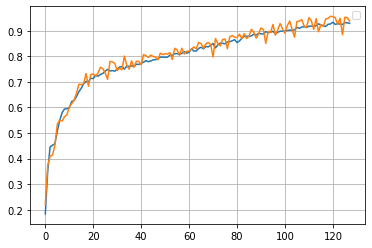

In [ ]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(rendering_history.history['sparse_categorical_accuracy'])
plt.plot(rendering_history.history['val_sparse_categorical_accuracy'])
plt.legend()

No handles with labels found to put in legend.


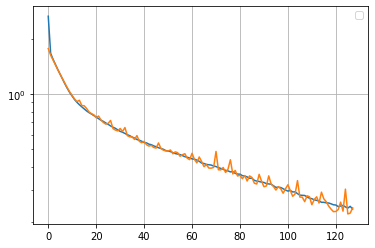

In [ ]:
plt.semilogy(rendering_history.history['loss'])
plt.semilogy(rendering_history.history['val_loss'])
plt.grid(True)
plt.legend()

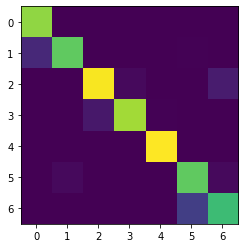

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from matplotlib.pyplot import imshow
y_predict = model.predict(train_x)
y_predict = np.argmax(y_predict,axis=1)
cm = confusion_matrix(train_y,y_predict)
imshow(cm)

In [ ]:
100*sum(cm[o,o] for o in range(len(cm)))/np.sum(cm)

91.85091598231206